# Baseline

## Imports

In [0]:
from fastai import *
from torch import nn
import imageio
import torch
import glob
from fastai.vision import *
import os
import torch.nn.functional as F

## Data

In [2]:
colab = True
if colab:
  from google.colab import drive
  drive.mount('/content/drive', force_remount = True)
  %cp "/content/drive/My Drive/autoencoder-training/model_layers.py" .
  %cp "/content/drive/My Drive/autoencoder-training/baseline_model.py" .
  import baseline_model
else: 
  os.chdir("../")
  image_path = os.getcwd() + "/data"
  from resnet_autoencoder_training import baseline_model

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
np.random.seed(3333)
torch.manual_seed(3333)

size = 32
batchsize = 128

path = untar_data(URLs.MNIST)
tfms = get_transforms(do_flip=True, flip_vert=True, max_rotate=10, max_zoom=1.1, max_lighting=0.2, max_warp=0.2, p_affine=0, 
                      p_lighting=0.75)
src = (ImageImageList.from_folder(path).split_by_folder("training", "testing").label_from_func(lambda x: x))
data = (src.transform(tfms, size=size, tfm_y=True).databunch(bs=batchsize).normalize(imagenet_stats, do_y = False))

## Model

In [0]:
autoencoder = baseline_model.autoencoder()

In [0]:
learn = Learner(data, autoencoder, loss_func = F.mse_loss)

## Training

In [6]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,time
0,0.004295,0.003656,01:40
1,0.002538,0.002248,01:42
2,0.001839,0.001670,01:42
3,0.001368,0.001354,01:42
4,0.001198,0.001097,01:43


In [7]:
learn.lr_find()

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 4.79E-06
Min loss divided by 10: 6.31E-08


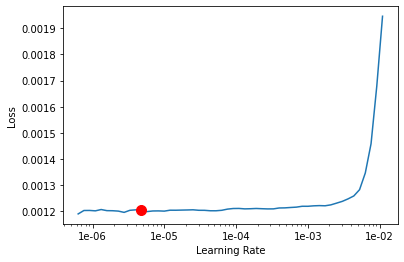

In [8]:
learn.recorder.plot(suggestion = True)

In [10]:
learn.fit_one_cycle(10, max_lr = 1e-03)

epoch,train_loss,valid_loss,time
0,0.001222,0.001148,01:42
1,0.001278,0.001221,01:43
2,0.001277,0.001241,01:43
3,0.001242,0.001341,01:44
4,0.001160,0.001066,01:44
5,0.001087,0.001001,01:44
6,0.001039,0.000947,01:43
7,0.000969,0.000892,01:44
8,0.000935,0.000862,01:42
9,0.000925,0.000855,01:40


## Results

### Training

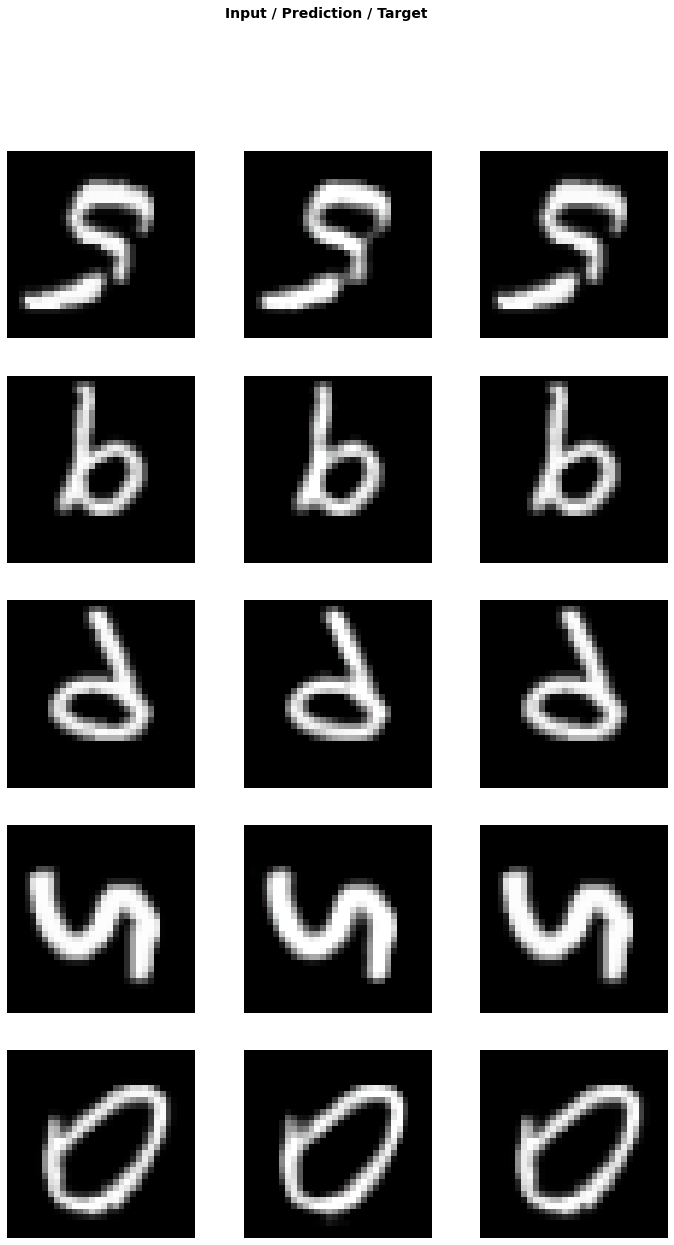

In [11]:
learn.show_results(ds_type=DatasetType.Train)

### Validation

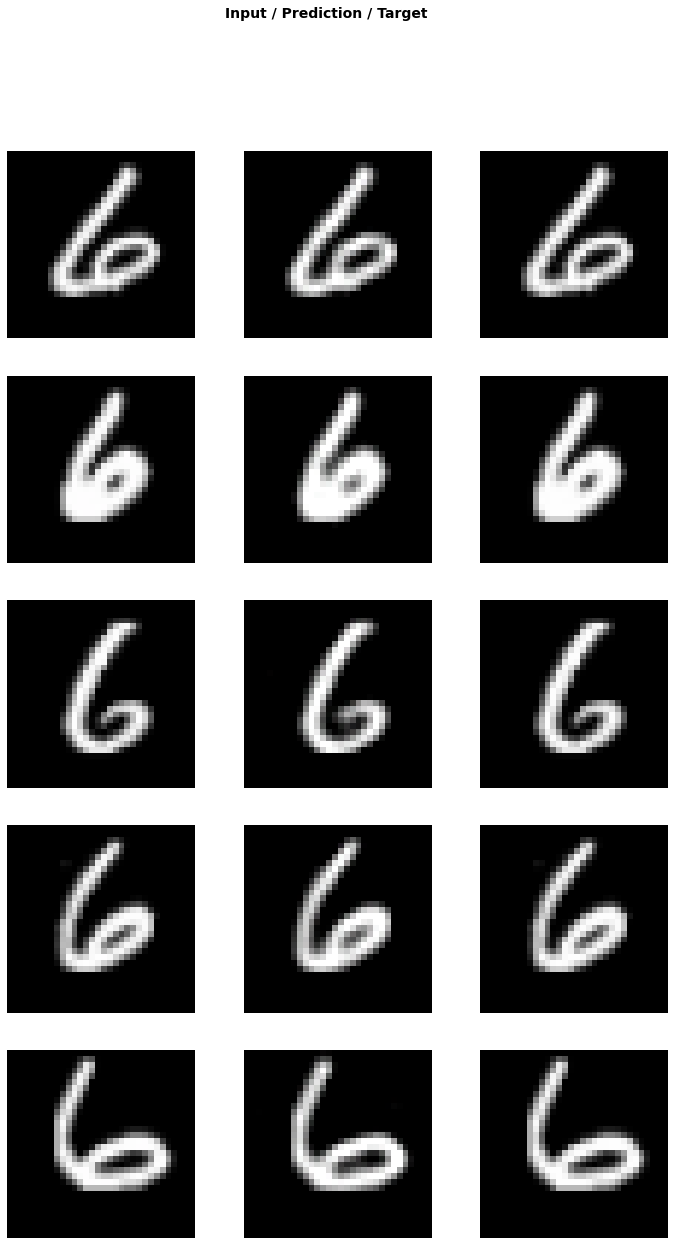

In [12]:
learn.show_results(ds_type=DatasetType.Valid)